# Ecuaciones generalizadas de estimación (datos crecimiento de arboles)

(Diggle et al. (1994, p´agina 5)) El principal objetivo del análisis de estos datos es evaluar
el efecto de la contaminación del ozono sobre el crecimiento de los árboles. Como
la contaminación por ozono es común en las zonas urbanas, el impacto del aumento de
las concentraciones de ozono en el crecimiento de los árboles es de considerable interés.
La respuesta es el tamaño del árbol, donde el tamaño se mide convencionalmente mediante el producto de la altura del árbol y el diámetro del tallo al cuadrado. En un primer grupo, un total de 54 árboles fueron cultivados bajo una atmosfera enriquecida
con ozono (es decir, una exposición al ozono de 70 partes por billón), mientras que en un segundo grupo se cultivaron 25 árboles en condiciones atmosféricas normales. El tamaño de cada uno de los 79 árboles se observo 13 veces a traves del tiempo, es decir,  152, 174, 201, 227, 258, 469, 496, 528, 556, 579, 613, 639 y 674 días desde el comienzo del experimento. Por lo tanto, el objetivo es comparar los patrones de crecimiento de los árboles bajo las dos condiciones. Estos datos se encuentran en el archivo **spruce.xls**, donde:

* tree: Identificador del arbol.
* days,  Días desde el comienzo del experimento.
* size, Tamaño del árbol.
* treatment: Tratamiento aplicado atmósfera enriquecida con ozono (treatment=1), y atmósfera normal (treatment=0).

In [13]:
rm(list=ls())
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")
library(sqldf)
library(numDeriv)
library(Rfast)
source("macros.txt")
source("test.txt")

In [18]:
###################### Lectura de los datos ######################
library(readxl)
spruce <- read_excel("spruce.xls.xlsx")
str(spruce)
head(spruce,n=15)

Classes 'tbl_df', 'tbl' and 'data.frame':	1027 obs. of  4 variables:
 $ tree     : chr  "N1T01" "N1T01" "N1T01" "N1T01" ...
 $ days     : num  152 174 201 227 258 469 496 528 556 579 ...
 $ size     : num  92.8 156 177.7 223.6 225.9 ...
 $ treatment: num  0 0 0 0 0 0 0 0 0 0 ...


tree,days,size,treatment
N1T01,152,92.75856,0
N1T01,174,156.02246,0
N1T01,201,177.68281,0
N1T01,227,223.63159,0
N1T01,258,225.87912,0
N1T01,469,301.87107,0
N1T01,496,301.87107,0
N1T01,528,387.61012,0
N1T01,556,478.18611,0
N1T01,579,566.79631,0


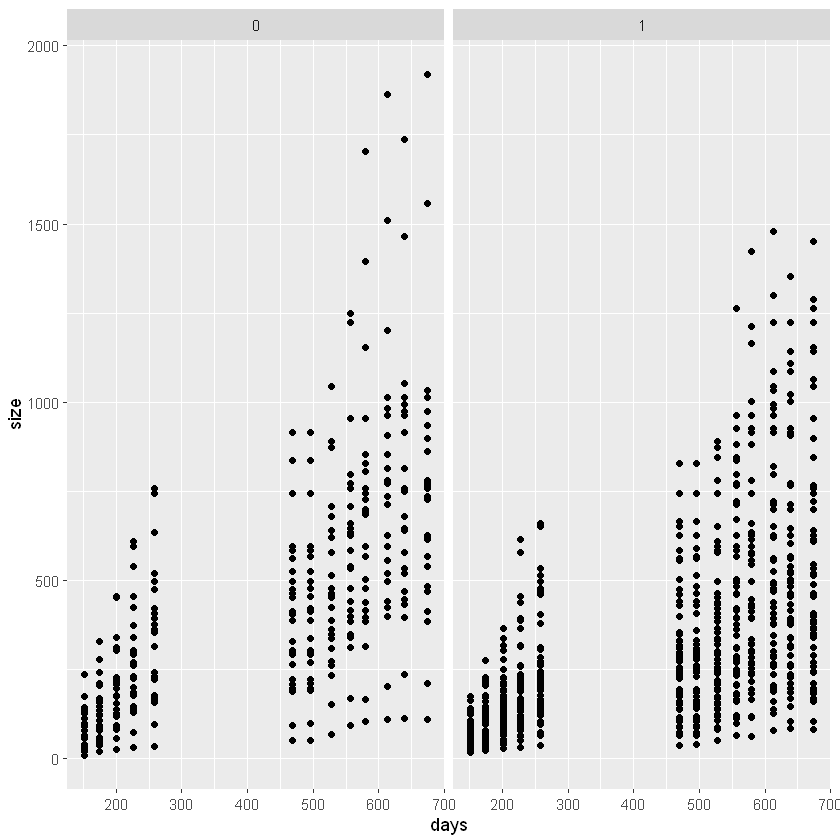

In [20]:
library(ggplot2)
ggplot(spruce, aes(x = days, y = size)) +
geom_point() +
facet_grid(~ treatment)


Del gráfico anterior podemos decir que a medida que aumenta el tiempo, la varianza de las observaciones aumenta en los dos tipos de atmósfera, támbien se puede decir que la dispersión en
ambos tipos de atmósfera es simila, y crece respecto a la media.

**B)**



Call:
glm(formula = size ~ treatment + poly(days, degree = 4), family = Gamma("log"), 
    data = spruce)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6454  -0.5008  -0.1069   0.2551   1.3655  

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              5.92243    0.03181 186.206  < 2e-16 ***
treatment               -0.28732    0.03847  -7.469 1.73e-13 ***
poly(days, degree = 4)1 19.94313    0.57339  34.781  < 2e-16 ***
poly(days, degree = 4)2 -2.80481    0.57339  -4.892 1.16e-06 ***
poly(days, degree = 4)3  5.45623    0.57339   9.516  < 2e-16 ***
poly(days, degree = 4)4 -4.14353    0.57339  -7.226 9.70e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.328772)

    Null deviance: 756.5  on 1026  degrees of freedom
Residual deviance: 364.8  on 1021  degrees of freedom
AIC: 13323

Number of Fisher Scoring iterations: 5


  |++++++++++| 100%


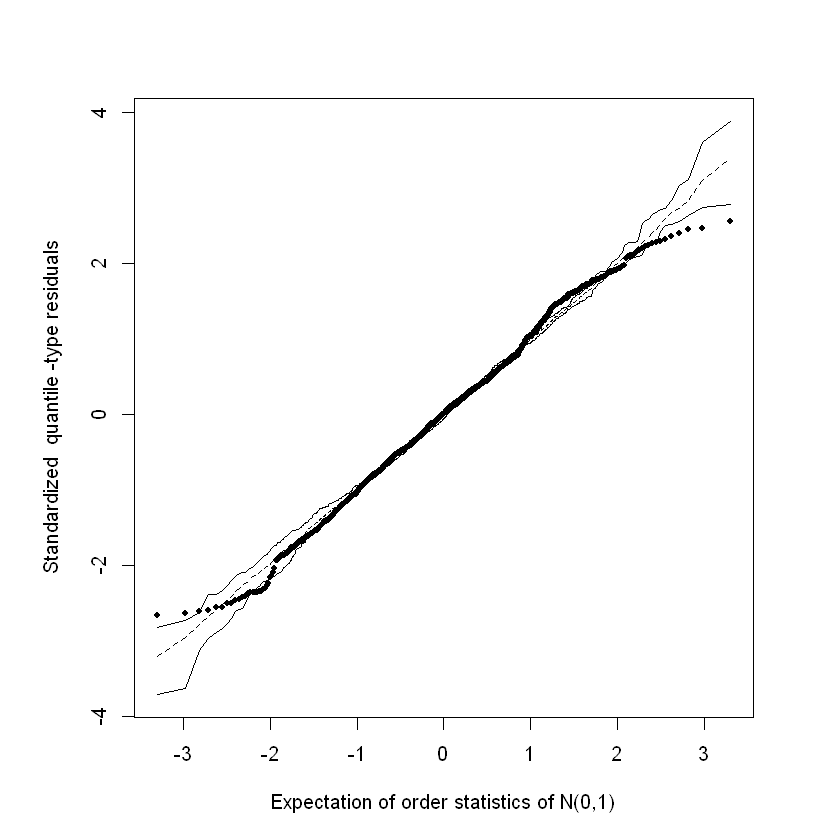

In [23]:
fit1 <- glm(size ~ treatment+ poly(days, degree = 4), family=Gamma("log"),data=spruce)
summary(fit1)
envelope_glm(fit1,rep=10)


El modelo ajustado corresponde a

$$Y_k ∼ Gamma(µk, φ)$$
$$log(µ_k) = \beta_1 + \beta_2 ∗ xk1 + \beta_3 ∗ xk2 + \beta_4 ∗ x2k2 + \beta_5 ∗ x3k2 + \beta_6 ∗ x4k2$$
$$Y1, · · · ,Yn \;\; independientes$$

donde $x_{k1}$ corresponde al tratamiento aplicado y $x_{k2}$ a la variable días. Los resultados obtenidos al
ajustar este modelo indican que el tratamiento de la atmósfera enriquecida con ozono disminuye
el creciemiento del árbol comparado con la atmósfera normal.


In [24]:
fit11 <- geeglm(size ~ treatment+poly(days, degree = 4), data=spruce, id=tree, family=quasi(variance = "mu^2", link = "log"), corstr="AR-1")
fit12 <- geeglm(size ~ treatment+poly(days, degree = 4), data=spruce, id=tree, family=quasi(variance = "mu^2", link = "log"),corstr="Exchangeable")
fit13 <- geeglm(size ~ treatment+poly(days, degree = 4), data=spruce, id=tree, family=quasi(variance = "mu^2", link = "log"),corstr="Stationary-M-dependent(2)")
fit14 <- geeglm(size ~ treatment+poly(days, degree = 4), data=spruce, id=tree, family=quasi(variance = "mu^2", link = "log"),corstr="Non-Stationary-M-dependent(2)")
QIC(fit11, fit12, fit13, fit14)


Iteration limit exceeded!!

Variance to mean relation:  Gamma 
                     Link:  log 
         Linear predictor:  1 + treatment + poly(days, degree = 4) 

 Object                   Correlation -2*quasi-likelihood  df    QIC  
  fit11                          AR-1            42038.87   6 42086.19
  fit12                  Exchangeable            42020.81   6 42067.68
  fit13     Stationary-M-dependent(2)            39321.47   6 39366.01
  fit14 Non-Stationary-M-dependent(2)            39084.82   6 39128.50


In [32]:
summary(fit14)


Sample size
       Number of clusters:  79
     Minimum cluster size:  13
     Maximum cluster size:  13
*************************************************************
Model
Variance to mean relation:  Gamma
                     Link:  log
    Correlation structure:  Non-Stationary-M-dependent(2)
*************************************************************
Coefficients
                         Estimate Std.Error   z-value Pr(>|z|)
(Intercept)               5.89414   0.10119  58.25090  < 2e-16
treatment                -0.28336   0.12587  -2.25131 0.024366
poly(days, degree = 4)1  19.91457   0.52317  38.06501  < 2e-16
poly(days, degree = 4)2  -4.15698   0.27198 -15.28400  < 2e-16
poly(days, degree = 4)3   4.14459   0.23623  17.54445  < 2e-16
poly(days, degree = 4)4  -3.17370   0.21667 -14.64749  < 2e-16

Dispersion  0.3536 
*************************************************************
Goodness-of-fit statistics
      -2*quasi-likelihood:  39084.82 
                      QIC:  39128.5 
 

De acuerdo a la salida anterior el criterio QIC, indica que el modelo que mejor se ajusta a los
datos, es el modelo que asume una estructura No estacinario M dependiente para la matriz de
correlación, que corresponde al modelo fit14.

Aquí en este modelo se conoce que **Number of clusters:79** hace correspondencia al número de clusters (79 árboles), 13 es el número maximo y nínimo de clusters, asi mismo **Variance to mean relation:  Gamma** establece que se está tomando la relación media varianza de la Gamma.

se conoce que *treatment: Tratamiento aplicado atmósfera enriquecida con ozono (treatment=1), y atmósfera normal (treatment=0)*  es decír que es 1 para tratamiento enriquecido con ozono y 0 si no.

* Dado que $\beta_2= -0.28336$ es negativo y además la función de enlace es monotona creciente luego afirmamos que al comparar dos arboles con el mismo número de dias pero uno bajo la atmósfera enriquecida y el otro normal entonces el que creció bajo la atmósfera enriquecida tiene un tamaño esperado menor que el arbol nacido en condiciones de atmosfera normal.

* Ese ozono desinibe el crecimiento del arbol 

**D)**

In [34]:
fit2 <- geeglm(size ~ poly(days, degree = 4), data=spruce, id=tree, family=quasi(variance = "mu^2", link = "log"), corstr="Non-Stationary-M-dependent(2)")

In [35]:
anova_glm(fit14,fit2,test="wald")


  Wald test 

 Model 1:  size ~ treatment + poly(days, degree = 4) 
 Model 2:  size ~ poly(days, degree = 4) 

   Chi    Df   Pr(>Chi)  
  5.0684   1    0.02437 *


De acuerdo con el test de Wald, a un nivel de sinificancia aproximado del $5\%$ la variable treatment
es significatica por lo tanto podemos concluir que el patrón de crecimiento de los árboles depende
del tipo de atmósfera bajo la cual crecen.

# Interpretacion

De acuerdo al modelo ajustado fit14, si comparamos el creciemineto de dos individuos cuyas características son iguales a excepción de la variable tratamiento entonces el crecimiento promedio de
un árbol expuesto a la atmósfera enriquecida con ozono es 24,69% menor al de un árbol expuesto
a una atmósfera normal.

# Diagnóstico del modelo




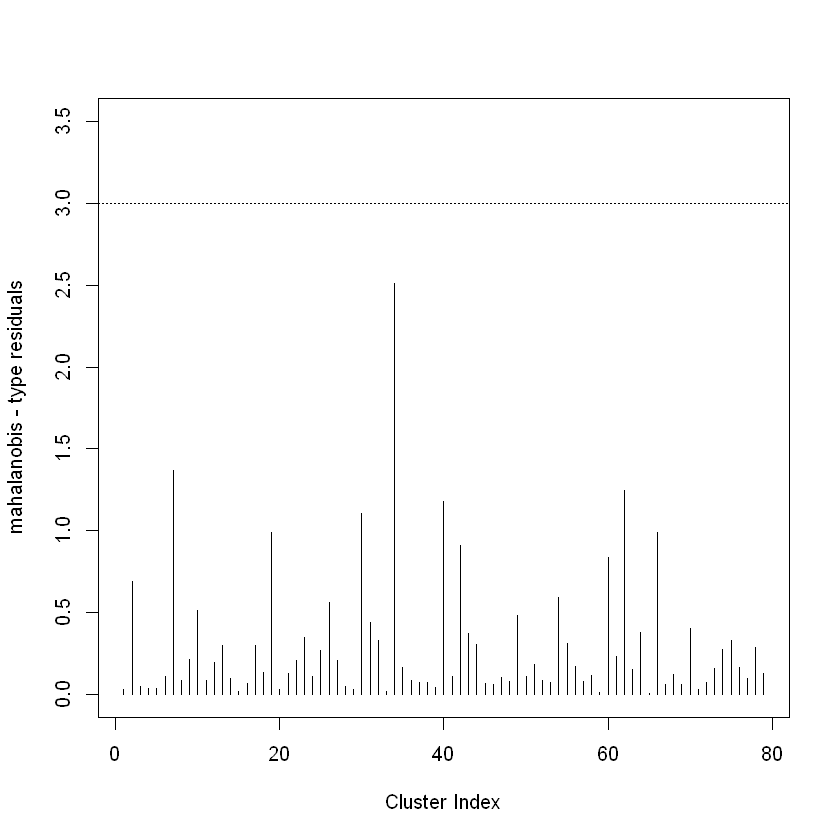

In [30]:
residuals(fit14,out=FALSE,plot=TRUE,type="mahalanobis",identify=1)


Los residuales basados en la distancia de Mahalanobis, nos indican que la observación que corresponde al árbol 01T09 podría tratarse de un dato influyente, sin embargo como se observa todos
los valores se mantienen dentro de las bandas. Por otra parte haciendo uso de la distansia de cook
se identifican como datos influyentes a las observaciones que corresponden a los árboles N1T02,
N1T07, N2T07, O1T09 Y 02T10.

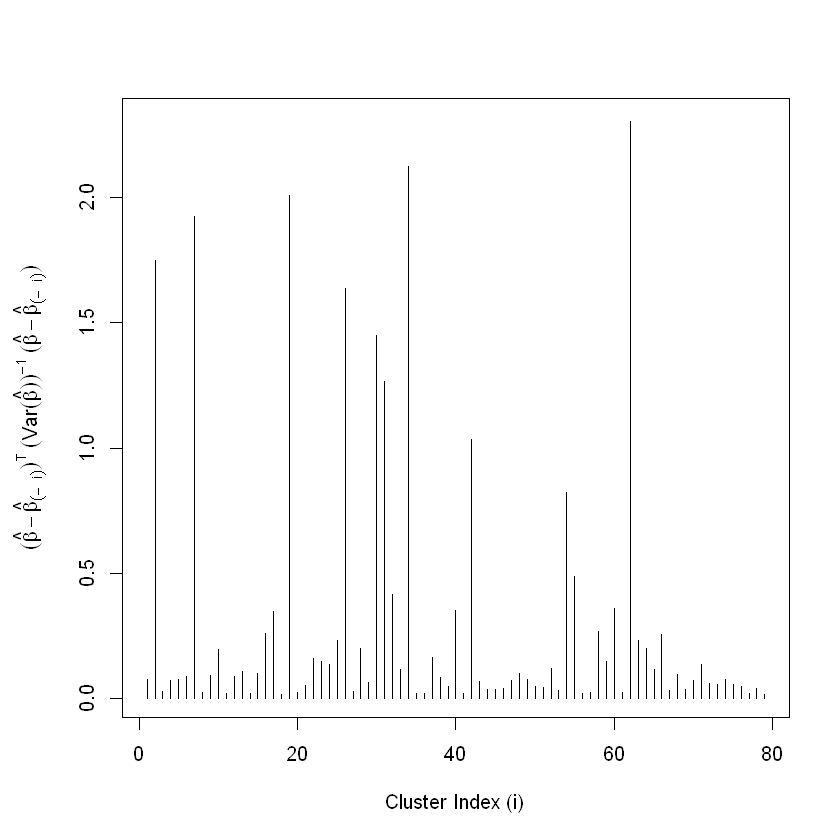

In [31]:
CookDistance(fit14,plot=TRUE,out=FALSE,identify=5)